![enter image description here](https://img.shields.io/badge/Author-Nestor_Batista_Díaz-yellow)

# **Ejemplo 2_3:** Determinación de outliers
---

Generamos una muestra de una población normal e introducimos dos outliers, uno teniendo un valor muy pequeño y otro muy grande

In [1]:
# LIBRERÍAS EMPLEADAS EN EL EJEMPLO
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
# Tratamiento estadístico
# ==============================================================================
import scipy.stats as st
# Generación de datos
# ==============================================================================
mu, sigma = 50, 10 # media y desviación típica de la población
# Generamos una muestra de tamaño 100
datos = np.random.normal(mu, sigma, 100)
# Cambiamos los valores de dos datos para convertirlos en outliers
datos[50]=100
datos[75]=1
datos

array([ 52.63497461,  53.83042868,  50.26565313,  33.99449319,
        59.97880134,  48.74981187,  69.19249048,  62.4573993 ,
        59.3592933 ,  46.15464533,  57.13030747,  50.68645821,
        51.89627438,  49.59237303,  51.36170614,  44.56649355,
        51.70967728,  61.88230984,  51.40818402,  54.75046094,
        58.75932037,  52.27693772,  46.06413371,  39.00788324,
        63.88177684,  49.01745492,  54.00522833,  69.95295199,
        50.16884318,  51.83905659,  31.26254584,  60.56071877,
        48.68505346,  52.1600902 ,  48.5518378 ,  35.02409169,
        43.75917978,  45.59009224,  38.73961488,  54.0883329 ,
        52.90423811,  49.22550043,  43.88032001,  48.65453818,
        45.06516554,  42.32671505,  49.11519817,  49.60549993,
        52.87771749,  53.92549873, 100.        ,  44.17197078,
        52.24873879,  39.48942478,  71.4079198 ,  51.89295276,
        29.68838436,  51.52654444,  60.1494863 ,  40.18769947,
        56.24221258,  42.98620198,  48.86449512,  55.50

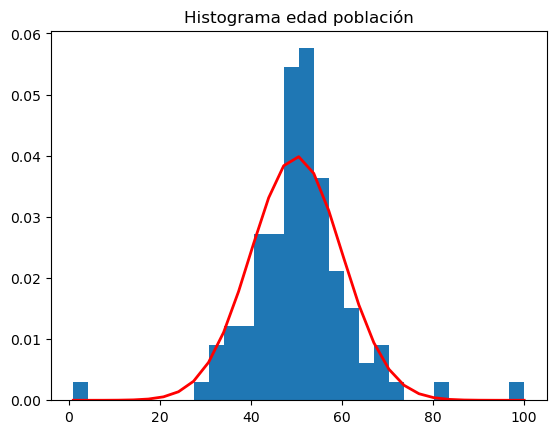

In [2]:
# A modo de curiosidad: con la siguiente herramienta podemos observar si los datos que vamos a procesar tiene una distribución normal
import matplotlib.pyplot as plt
# bins (seg. parámetro = 30): representa el número de bandas que se representa en la gráfica,
#       es un arrary que contiene los valores utilizados para realizar la división de los valores a representar
# density: Muestra la línera roja que indica la densidad (número de puntos) de los grupos creados a partir del parámetro bins

count, bins, ignored = plt.hist(datos, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.title("Histograma edad población")
plt.show()

# Técnicas:
Hay dos técnicas para determinar los tamaños de  la bandas:

.- (Método 1) Uno es calcular el valor de alfa, basado en una probabilidad

.- (Método 2) Otro es determinando la posición de los cuartiles 1 y 3

**MÉTODO 1:** Construcción de las bandas al 95% para detección de outliers



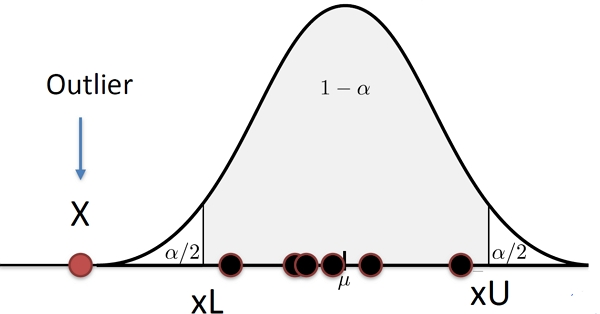

# (Método 1) Uno es calcular el valor de alfa, basado en una probabilidad

In [3]:
# CRITERIO 1: PROBABILIDAD GLOBAL - Explicado en el capítulo 5 - Preprocesamiento (Semana 2), en la pág 10
# Asumiendo que las variables tiene una distribución normal.
# Probabilidad de la muestra de estar dentro de las bandas
p_g=0.95
# probabilidad global
alfa_g=(1-p_g)/2
# probabilidad  para un solo dato
alfa= 1-(1-alfa_g)**(1/len(datos)) # Se realiza este ajuste para ser más precisos.
#alfa = alfa_g # Si no realiza la corrección de la línea anterior entonces hubiese detectado más valores que son outliers cuando realmente no lo son. Descomentar esta línea para ver el resultado, que es el mismo que el obtenidoi con el método 2 de este código.
                # con esta corrección lo que se pretende es obtener bandas lo sificientemente anchas.


El código anterior corresponde a esta fórmula:
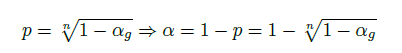

In [4]:
## CRITERIO 2:  Criterio Chauvenet
# El uso del Criterio de Chauvenet es controvertido en algunas áreas de la estadística, ya que puede llevar a descartar datos válidos,
# especialmente en conjuntos de datos pequeños o en situaciones donde los datos no siguen una distribución normal.
# Por lo tanto, debe usarse con precaución y teniendo en cuenta el contexto específico de los datos analizados.

#alfa=1/(2*len(datos))
Z_alfa=st.norm.ppf(1-alfa/2)


In [5]:
# Impresión de resultados
alfa=round(alfa,5)
Z_alfa=round(Z_alfa,5)
print(f" Alfa ={alfa}")
print(f" Z_alfa ={Z_alfa}")

 Alfa =0.00025
 Z_alfa =3.65906


Cálculo de bandas

Truco: Si los datos tiene una distribución normal calcula estas bandas con la fórmula/técnica propuesta en las siguientes celdas

In [6]:
# Utilizaremos el Criterio 1 ó el Criuterio 2 para calcular alfa y Z-alfa en función de la naturaleza de los datos que estamos procesando.
xL=  round(np.mean(datos)-Z_alfa*  np.std(datos),4)
xU=  round(np.mean(datos)+Z_alfa*  np.std(datos),4)
print(f" Banda= [ {xL},{xU}]")

 Banda= [ 9.2895,92.2761]


In [7]:
for i in  range(len(datos)):
        if datos[i] < xL  or datos[i]>xU:
          print(f" El dato[{i}]={datos[i]} es un outlier")

 El dato[50]=100.0 es un outlier
 El dato[75]=1.0 es un outlier


¿Qué hubiera ocurrido si **no** se hubiera efectuado la corrección de la probabilidad global?

Si no realiza la corrección hubiese detectado más valores que son outliers cuando realmente no lo son


# (Método 2) Otro es determinando la posición de los cuartiles 1 y 3

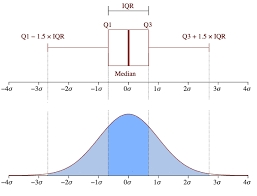

In [8]:
Q1 = np.quantile(datos,0.25)
Q3 = np.quantile(datos,0.75)
IQR = Q3 - Q1 # Ver la gráfica para entender el concepto de IQR (Rango intercuartílico)
#k=1.5 # k=1,5 es un outlier leve y k=3 es un outlier extremo
k=1.8 # Variando este valor lograremos hacer las bandas más o menos estrechas ó anchas
xL=Q1 - k * IQR
xU=Q3 + k * IQR
print(f" Banda= [ {xL},{xU}]")


 Banda= [ 26.30547847595837,74.42556385898108]


In [9]:
datos_ord=datos
datos_ord.sort()
datos_ord

array([  1.        ,  29.68838436,  31.26254584,  33.94473407,
        33.99449319,  35.02409169,  35.83447751,  35.91339908,
        36.91293834,  38.73961488,  39.00788324,  39.48942478,
        40.18769947,  41.45726032,  41.68022802,  42.32671505,
        42.32684199,  42.71345531,  42.98620198,  43.45656361,
        43.75917978,  43.88032001,  44.17197078,  44.56649355,
        45.06516554,  45.15838096,  45.50512576,  45.59009224,
        46.04795874,  46.06413371,  46.15464533,  48.5518378 ,
        48.65453818,  48.68505346,  48.74981187,  48.86449512,
        48.99150143,  49.01745492,  49.11519817,  49.22550043,
        49.29252806,  49.34978605,  49.59237303,  49.60549993,
        49.82065793,  49.85625294,  50.16884318,  50.21552361,
        50.26565313,  50.68645821,  51.36170614,  51.40818402,
        51.52654444,  51.53228424,  51.70967728,  51.83905659,
        51.89295276,  51.89627438,  52.15763003,  52.1600902 ,
        52.24873879,  52.27693772,  52.38108296,  52.40

In [10]:

for i in  range(len(datos)):
        if datos[i] < xL  or datos[i]>xU:
          print(f" El dato[{i}]={datos[i]} es un outlier")

 El dato[0]=1.0 es un outlier
 El dato[98]=82.49118724840957 es un outlier
 El dato[99]=100.0 es un outlier
